# Radial distribution function

### Import libraris

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
import nglview

### Code for rdf (r)

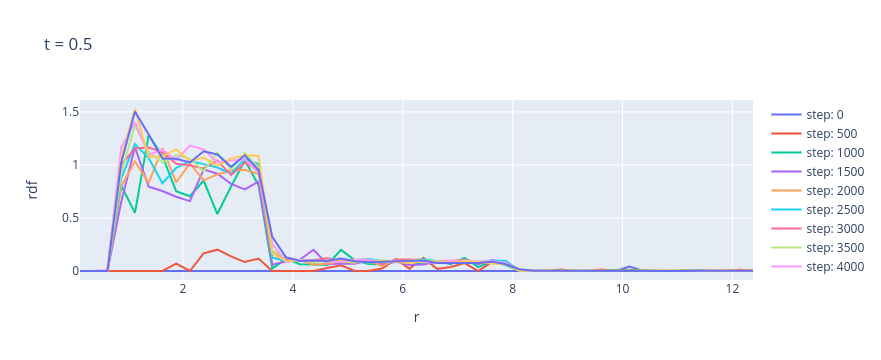

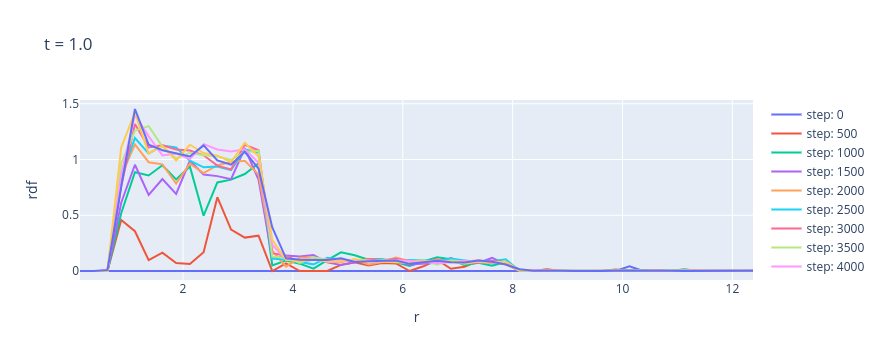

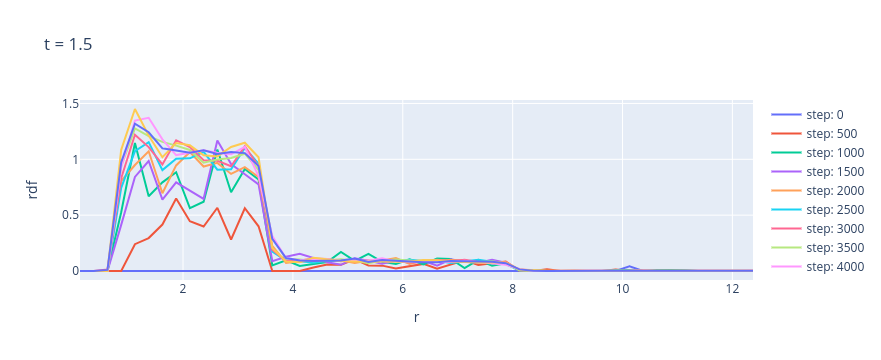

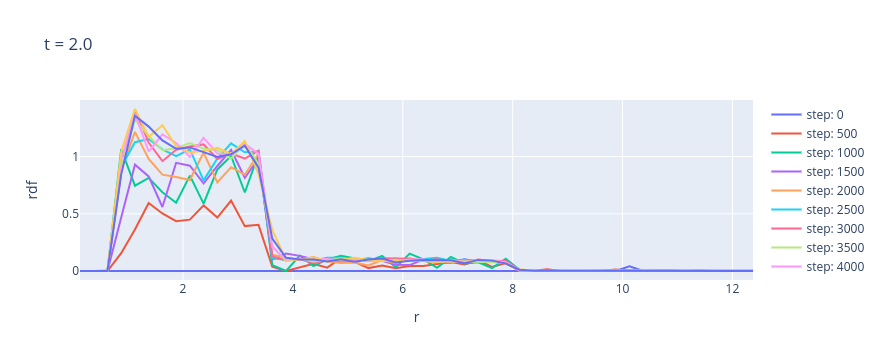

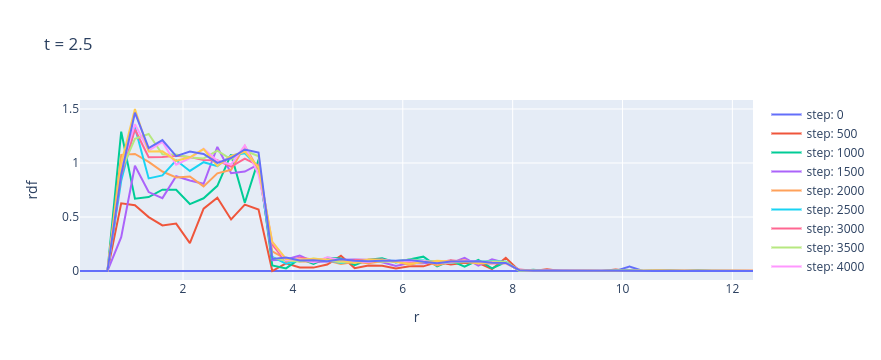

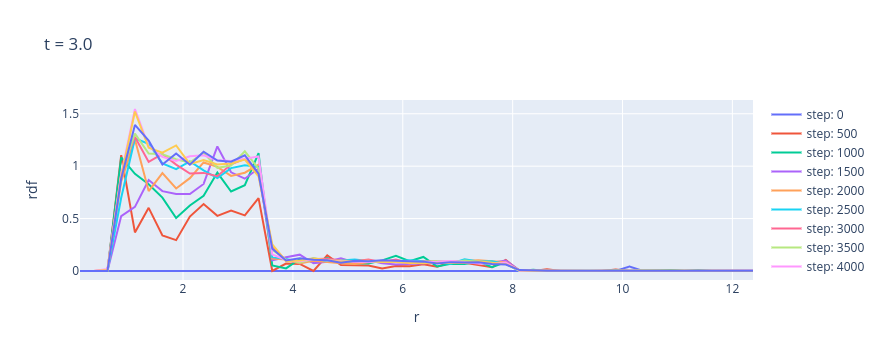

In [30]:
Temp=[0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
for temp in Temp:
    f=open('../rdf/tmp_{}.rdf'.format(temp))
    Nlines=0
    rdf_dict={}
    for line in f.readlines():
        if (line[0]=='#'):
            continue
        lineS=line.split()
        if (len(lineS) == 2):
            Nlines=int(lineS[1])
            step=int(lineS[0])
            rdf_dict[step]={
                'r': [],
                'rdf': []
            }
            continue
        if not (len(lineS) == 4):
            print ("Error: not 4 columns")
            break
        if (Nlines<0):
            print ("Error: Nlines < 0")
            break

        rdf_dict[step]['r'].append(float(lineS[1]))
        rdf_dict[step]['rdf'].append(float(lineS[2]))
        Nlines -= 1
    fig = go.Figure()
    for step in rdf_dict:
        fig.add_trace(go.Scatter(x=rdf_dict[step]['r'], y=rdf_dict[step]['rdf'], name="step: {:d}".format(step)))
    fig.update_layout(title="t = "+str(temp), yaxis=dict(title="rdf"), xaxis=dict(title="r"))
    fig.show()

## Visualization

In [22]:
from ase.io import read

In [24]:
data = read("../dump.colloid")

In [25]:
from ase.visualize import view 

In [29]:
view(data, viewer="ngl")

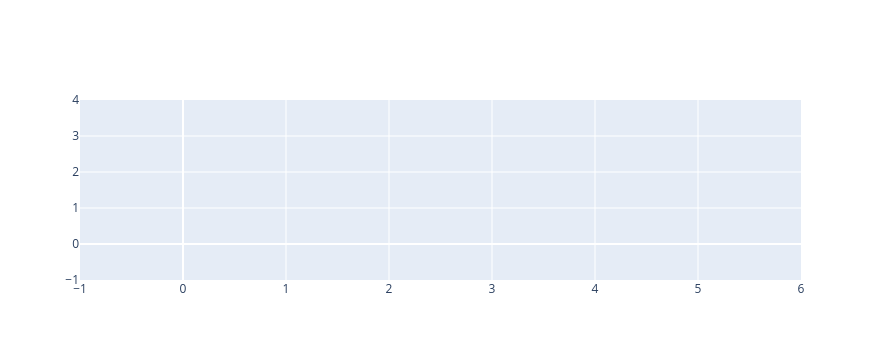

In [ ]:
steps = []
Temp=[0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
for temp in Temp:
    f=open('../rdf/tmp_{}.rdf'.format(temp))
    Nlines=0
    rdf_dict={}
    for line in f.readlines():
        if (line[0]=='#'):
            continue
        lineS=line.split()
        if (len(lineS) == 2):
            Nlines=int(lineS[1])
            step=int(lineS[0])
            rdf_dict[step]={
                'r': [],
                'rdf': []
            }
            continue
        if not (len(lineS) == 4):
            print ("Error: not 4 columns")
            break
        if (Nlines<0):
            print ("Error: Nlines < 0")
            break

        rdf_dict[step]['r'].append(float(lineS[1]))
        rdf_dict[step]['rdf'].append(float(lineS[2]))
        Nlines -= 1
    for step in rdf_dict:
        fig.add_trace(go.Scatter(x=rdf_dict[step]['r'], y=rdf_dict[step]['rdf'], name="step: {:d}".format(step)))
    fig.update_layout(title="t = "+str(temp), yaxis=dict(title="rdf"), xaxis=dict(title="r"))
fig.show()